***Following are the steps taken for this project***

- **1. Importing Libraries**
- **2. Checking data structure**
- **3. EDA**
    - Univariate Analysis
    - Bivariate Analysis
    - Checking Heatmap
- **4. Data Pre-processing**
    - Train and Test split
    - Outliers Treatment
    - Standardizing the variables
    - Dealing with class imbalance
- **5. Model Building**
    - Building Logistic Regression model on non-oversampled dataset
        - Feature Importance
    - Building Decision Tree Classifier model on non-oversampled dataset
        - Feature Importance
    - Building Random Forest Classifier model on non-oversampled dataset
        - Feature Importance
    - Building XGBoost Classifier model on non-oversampled dataset
        - Feature Importance
    - Building Logistic Regression model on SMOTETomek-oversampled dataset
    - Building Logistic Regression model on ADASYN-oversampled dataset
    - Building Decision Tree Classifier model on SMOTETomek-oversampled dataset
    - Building Decision Tree Classifier model on ADASYN-oversampled dataset
    - Building Random Forest Classifier model on SMOTETomek-oversampled dataset
    - Building Random Forest Classifier model on ADASYN-oversampled dataset
    - Building XGBoost Classifier model on SMOTETomek-oversampled dataset
    - Building XGBoost Classifier model on ADASYN-oversampled dataset
- **6. Model Evaluation**
- **7. Hyper-parameter Tuning**
    - Performing GridSearchCV on train dataset using 'Random Forest Classifier'
        - Initial Model
        - Modified Model
        - Final Model
    - Calculating cross val score using parameters of 'rf_gs_ada_3' model
- **8. Making prediction on test dataset**
    - Using power transform on test dataset variables
    - Standardizing the test dataset variables
    - Feature Importance
    - Predicting the test labels
- **Conclusion**

# 1. Importing relevant libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

C:\Users\DA1041TU\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
# Setting display options

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
plt.style.use('fivethirtyeight')

In [4]:
data = pd.read_csv('creditcard.csv')

- Checking first 5 rows and all columns in the dataset
- These are resultant columns after performing PCA except for columns 'Amount', 'Time' and 'Class'
- It seems the variables 'V1' to 'V28' are already scaled

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 2. Checking structure of data

- Checking shape of the dataset

In [5]:
data.shape

(284807, 31)

- Checking number of columns, data type, null values in the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

- **As stated in the problem statement there are no missing values**

# 3. EDA

- **Univariate Analysis**

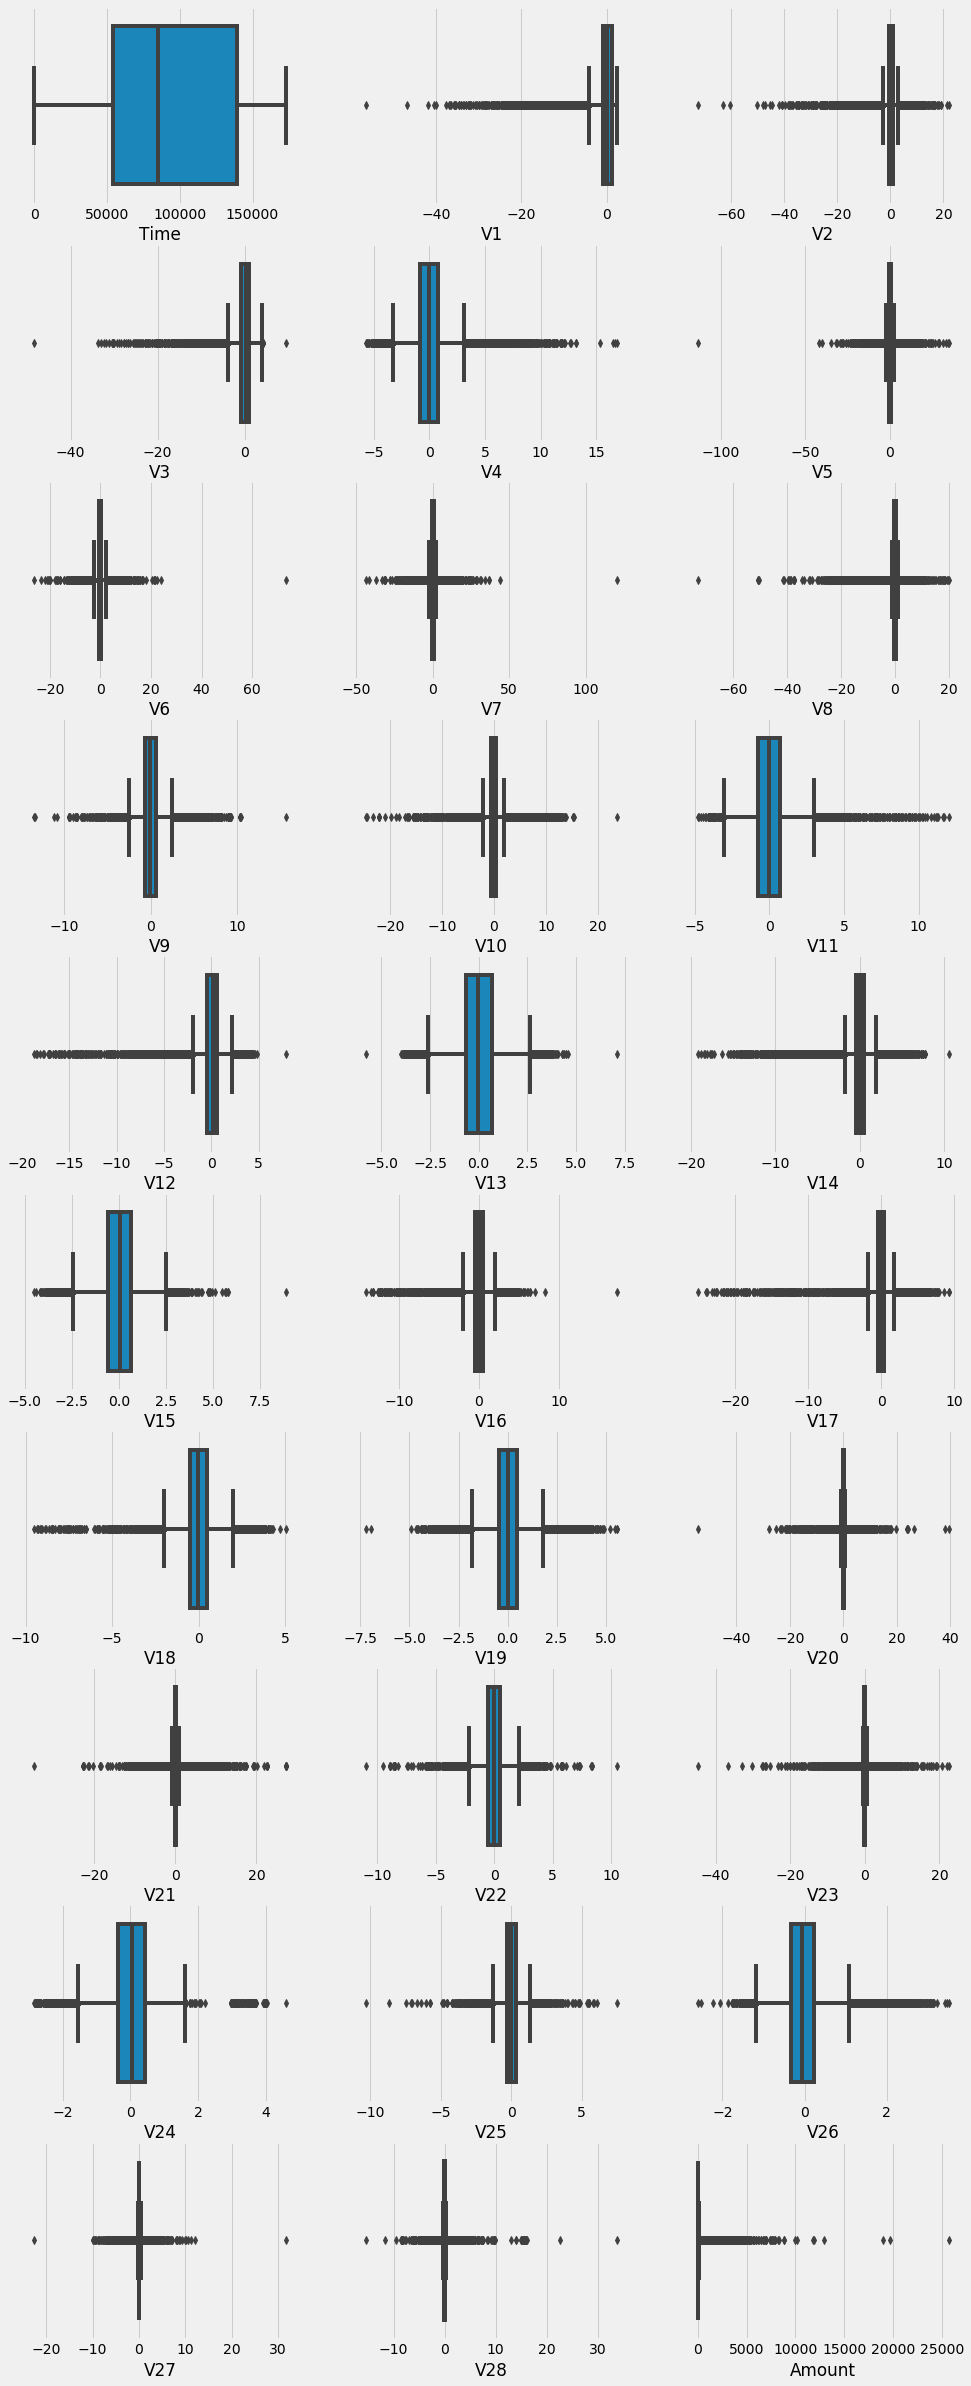

In [7]:
columns = data.columns[:-1]
plt.figure(figsize=(15,40))
for i in enumerate(columns):
    plt.subplot(10,3, i[0]+1)
    sb.boxplot(x=data[i[1]])
    
plt.show();

- ***Observations:***
- Except for 'Time' variable all other variables have lot of outiers and hence has very skewed distribution
- Need to perform transformation so that the distribution resembles normal distribution

- **Bivariate Analysis**

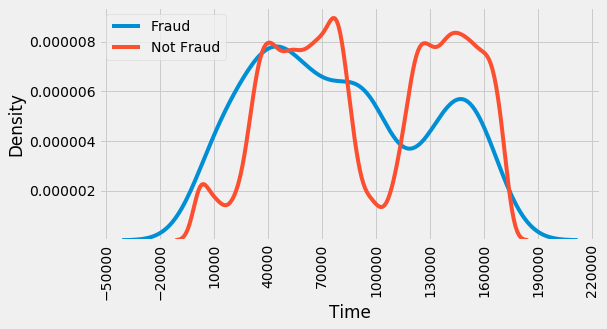

In [8]:
plt.figure(figsize=(8,4))
sb.kdeplot(data=data[data['Class']==1], x='Time', label='Fraud')
sb.kdeplot(data=data[data['Class']==0], x='Time', label='Not Fraud')
plt.xticks([-50000, -20000, 10000, 40000, 70000, 100000, 130000, 160000,
            190000, 220000], rotation='90')
plt.legend()
plt.show();

- ***Observations:***
- From the above plot we cannot clearly distinguish between 'Fraud' and 'Not Fraud' transactions
- Although, it seems that large proportion of 'Fraud' transactions have time duration of between 40000 and 50000

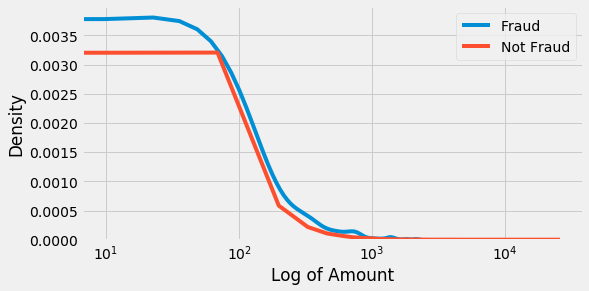

In [9]:
plt.figure(figsize=(8,4))
sb.kdeplot(data=data[data['Class']==1], x='Amount', label='Fraud')
sb.kdeplot(data=data[data['Class']==0], x='Amount', label='Not Fraud')
plt.xscale('log')
plt.xlabel('Log of Amount')
plt.legend()
plt.show();

- ***Observations:***
- It seems that large proprtion of frauds took place where the amount was less than 100
- For amounts greater than 100 frauds drop down drastically even though not completely

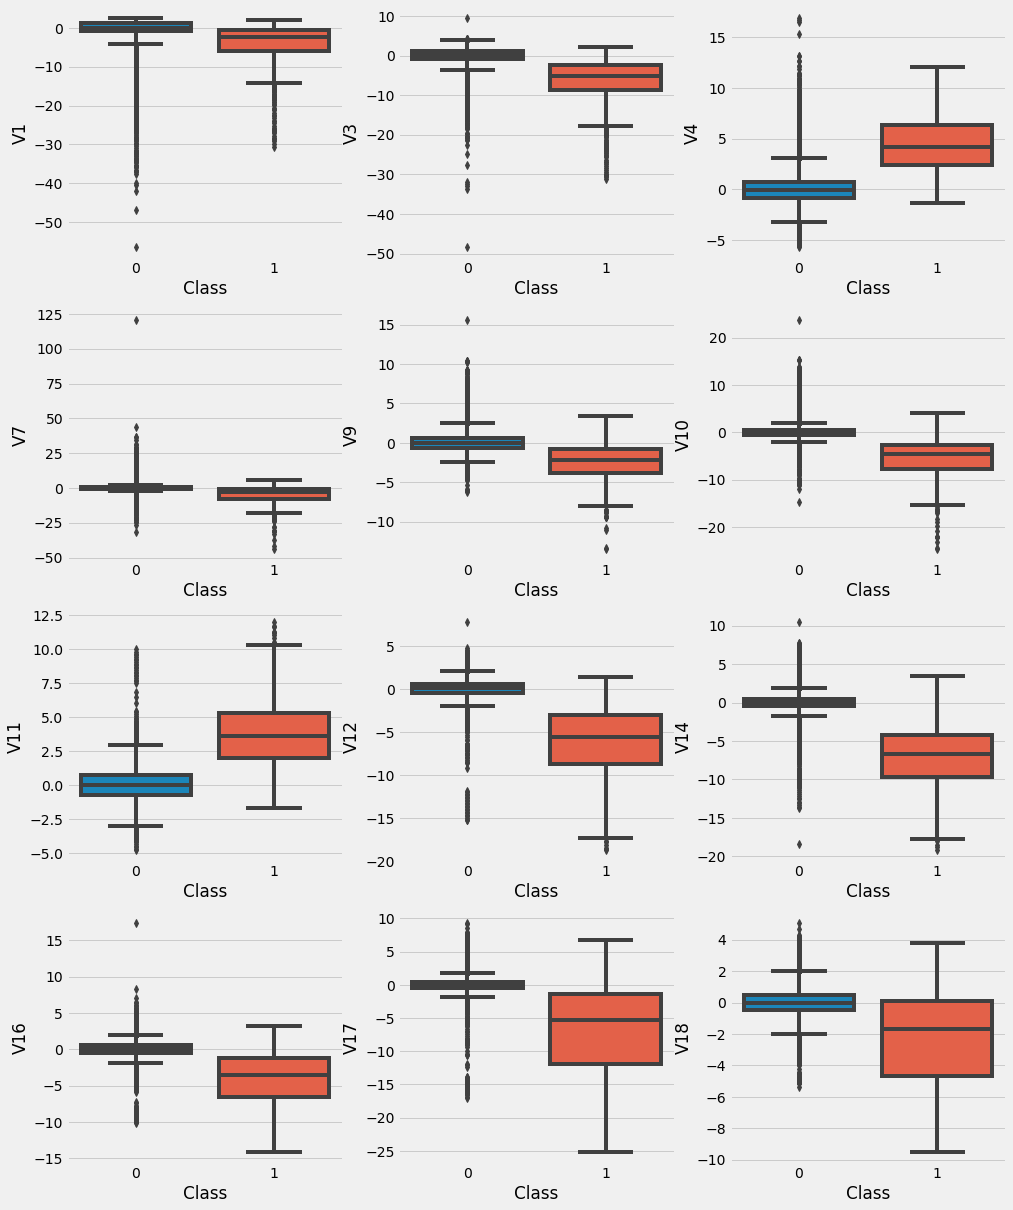

In [10]:
variables = ['V1', 'V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']
plt.figure(figsize=(15,25))

for i in enumerate(variables):
    plt.subplot(5,3, i[0]+1)
    sb.boxplot(y=data[i[1]], x=data['Class'])
    
plt.show();

- ***Observations:***
- Variables 'V1', 'V3', 'V7', 'V9', 'V10', 'V12', 'V14', 'V16', 'V17', 'V18' negatively impact fraud as per above boxplots. It may mean that having these variables may help in reducing the fraudulent transactions, they may act as a check on the transcations, an extra layer of security
- Variables 'V4', 'V11' positively impact fraud as per above boxplots
- This means that we need to be careful while dealing with these variables, as chances of fraudulent transactions are more in the case of these variables
- Since PCAs are linear combination of the original variables, we need to asses the weights of those original variables and determine which are those variables which are have positive or negative impact on the fraudulent transactions
- Classes in variables 'V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V13', 'V16', and 'V17' do not overlap much, which means they are able to bifurcate classes '0' and '1' very well, this means they are important in separating fraudulent transactions from non-fraudulent transactions

- **Checking `heatmap`**

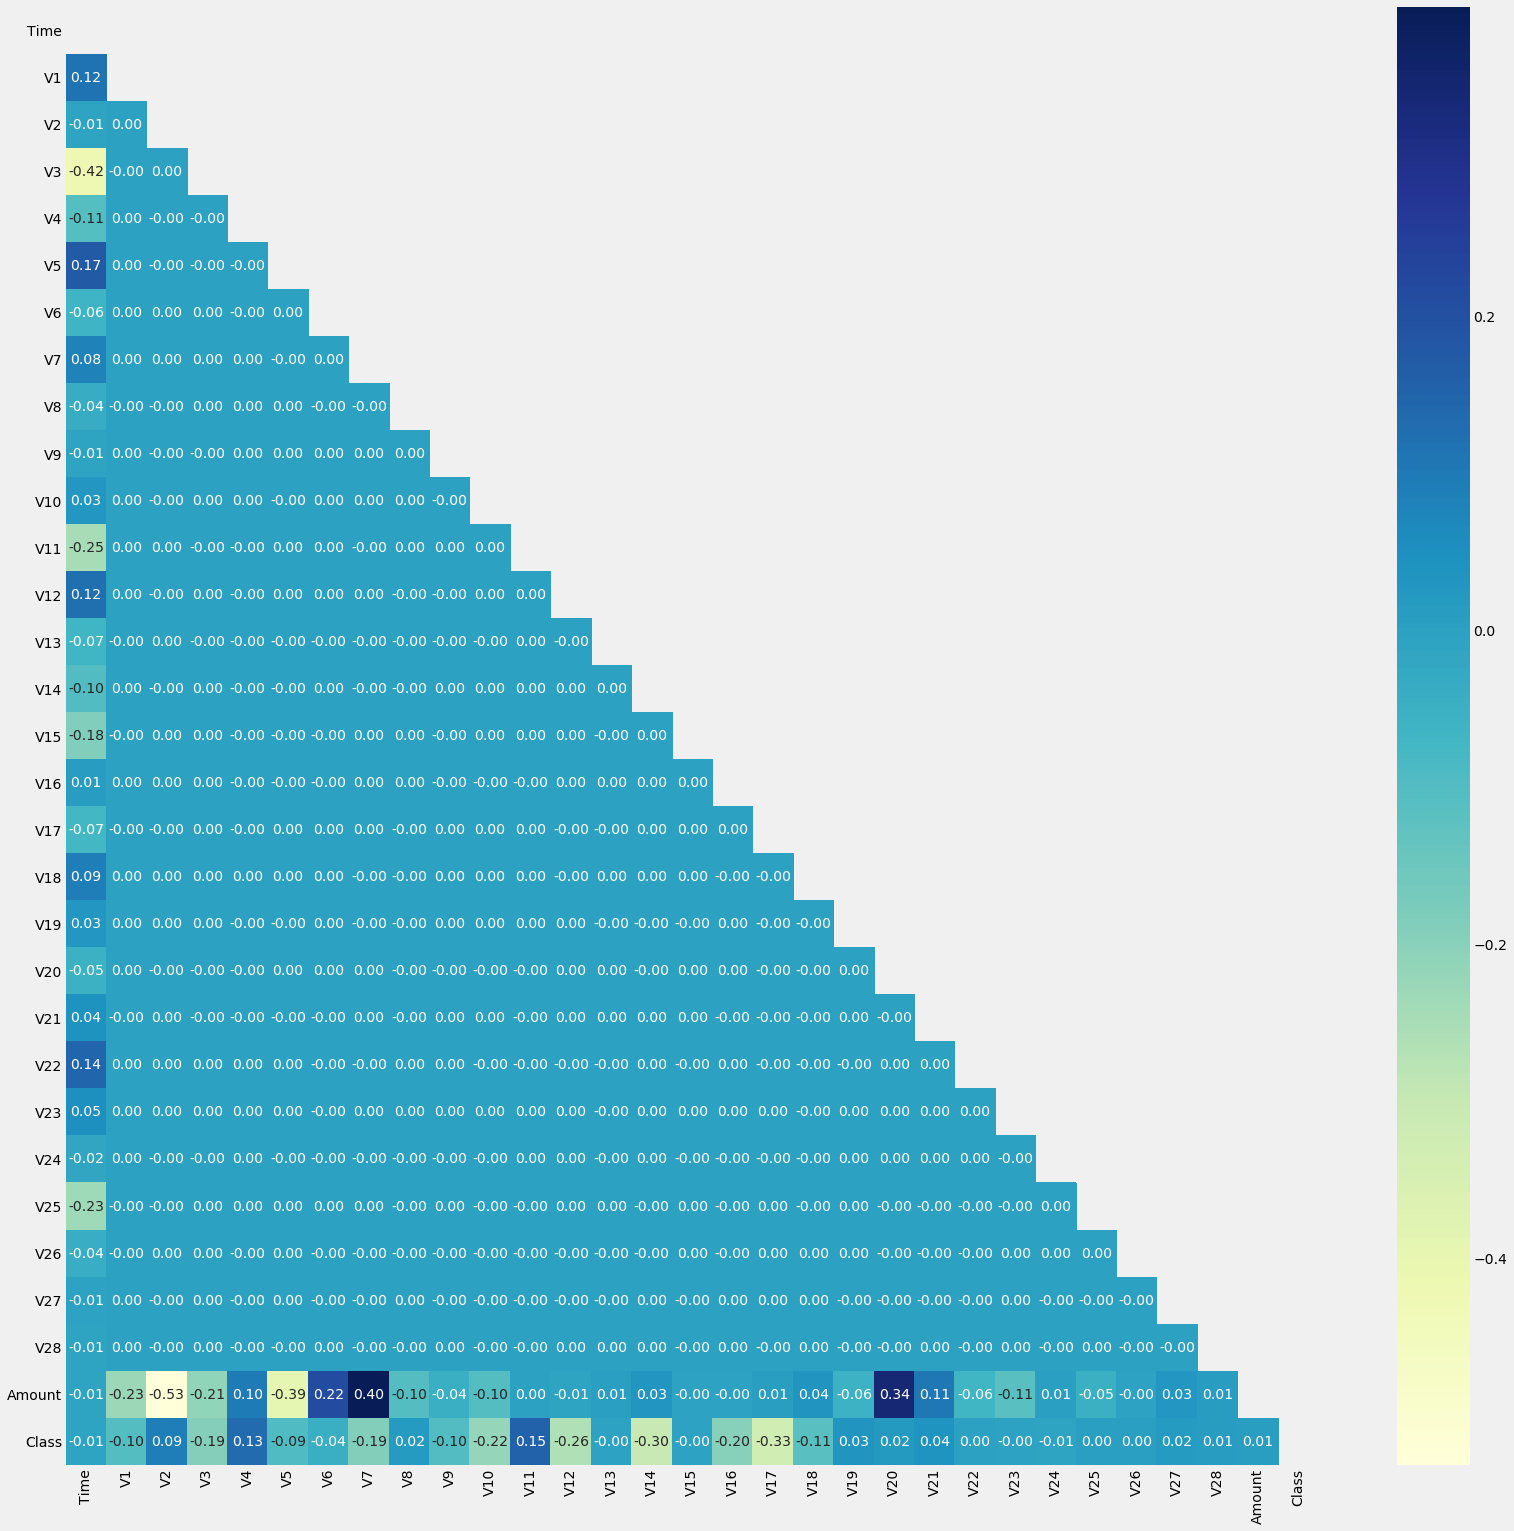

In [11]:
mat = data.corr()
lower = np.triu(np.ones_like(mat, dtype=bool))

plt.rcParams['figure.figsize'] = 25,25
sb.heatmap(mat, annot=True, cmap='YlGnBu', fmt='.2f', mask=lower)
plt.show();

- ***Observations:***
- Correlations between independent variables is '0', except for variables 'Time' and 'Amount', it is because these variables are results of PCA
- Correlation between dependent variable and independent variables is very less, below 0.4
- 'Amount' variable has negative correlation of '-0.53' with 'V2', and positive correlation of '0.40' with 'V7'
- 'Time' variable has negative correlation of '-0.42' with 'V3'
- Rest of the variables have very less correlation with the 'Class' variable

# 4. Data Preprocessing

- Checking for central tendency, variance and outliers in the numerical columns of the data

In [12]:
def stats_analysis(data):
    perc = [0, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 0.91, 0.92, 0.93, 0.94,
            0.95, 0.96,
            0.97, 0.98, 0.99, 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999, 1]
    data_Stats = data.describe(percentiles=perc).T
    data_Stats['Name of variable'] = data_Stats.index
    data_Stats['Q1'] = data_Stats['25%']
    data_Stats['Q3'] = data_Stats['75%']
    data_Stats['IQR'] = data_Stats['Q3'] - data_Stats['Q1']
    data_Stats['upper_bound'] = data_Stats['Q3'] + 1.5 * data_Stats['IQR']
    data_Stats['lower_bound'] = data_Stats['Q1'] - 1.5 * data_Stats['IQR']
    data_Stats['No of points crossing upper_bound'] = (data > data_Stats['upper_bound']).sum()
    data_Stats['No of points crossing lower_bound'] = (data < data_Stats['lower_bound']).sum()
    df = pd.DataFrame(data_Stats)
    return df

In [13]:
stats_check = stats_analysis(data)
stats_check

,count,mean,std,min,0%,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,91%,92%,93%,94%,95%,96%,97%,98%,99%,99.1%,99.2%,99.3%,99.4%,99.5%,99.6%,99.7%,99.8%,99.9%,100%,max,Name of variable,Q1,Q3,IQR,upper_bound,lower_bound,No of points crossing upper_bound,No of points crossing lower_bound
Time,284807.0,9.481386e+04,47488.145955,0.000000,0.000000,35027.000000,47694.200000,54201.500000,60776.000000,73261.400000,84692.000000,120396.000000,132929.000000,139320.500000,145247.800000,157640.400000,158996.000000,160279.000000,161633.580000,162893.000000,164143.400000,165582.760000,166988.820000,168657.000000,170560.940000,170756.000000,170959.552000,171170.358000,171372.164000,171554.000000,171773.776000,172029.000000,172264.388000,172522.194000,172792.000000,172792.000000,Time,54201.500000,139320.500000,85119.000000,266999.000000,-73477.000000,0,0
V1,284807.0,1.165980e-15,1.958696,-56.407510,-56.407510,-1.893272,-1.134663,-0.920373,-0.747294,-0.426756,0.018109,1.035107,1.224825,1.315642,1.694936,2.015409,2.030378,2.042643,2.054509,2.065825,2.081223,2.102888,2.126656,2.166568,2.237130,2.246630,2.255260,2.264531,2.273920,2.283888,2.293280,2.306799,2.321966,2.344685,2.454930,2.454930,V1,-0.920373,1.315642,2.236015,4.669664,-4.274396,0,7062
V2,284807.0,3.416908e-16,1.651309,-72.715728,-72.715728,-1.359862,-0.790814,-0.598550,-0.436393,-0.153805,0.065486,0.302738,0.636845,0.803724,0.957314,1.326635,1.391034,1.465491,1.554667,1.667666,1.808585,1.993437,2.264592,2.758192,3.801811,3.985247,4.185605,4.412945,4.660140,4.995677,5.394571,5.925012,6.717282,7.852129,22.057729,22.057729,V2,-0.598550,0.803724,1.402274,2.907135,-2.701961,5096,8430
V3,284807.0,-1.373150e-15,1.516255,-48.325589,-48.325589,-1.802587,-1.169050,-0.890365,-0.616806,-0.199061,0.179846,0.497040,0.843541,1.027196,1.215700,1.676173,1.734554,1.800616,1.879136,1.965941,2.062635,2.172822,2.308739,2.472804,2.728434,2.767073,2.806035,2.851357,2.895855,2.947882,3.010502,3.086170,3.196429,3.387393,9.382558,9.382558,V3,-0.890365,1.027196,1.917560,3.903536,-3.766705,20,3343
V4,284807.0,2.086869e-15,1.415869,-5.683171,-5.683171,-1.656329,-1.066085,-0.848640,-0.696226,-0.394161,-0.019847,0.284856,0.558866,0.743341,0.986188,1.482807,1.574830,1.696281,1.904418,2.286366,2.566501,2.817000,3.200516,3.720890,4.248032,4.321602,4.388166,4.453042,4.532526,4.641941,4.763046,4.912513,5.218752,6.235906,16.875344,16.875344,V4,-0.848640,0.743341,1.591981,3.131313,-3.236612,8905,2243
V5,284807.0,9.604066e-16,1.380247,-113.743307,-113.743307,-1.302171,-0.859581,-0.691597,-0.544455,-0.290112,-0.054336,0.186625,0.457029,0.611926,0.802235,1.407893,1.504984,1.617775,1.747457,1.909002,2.098960,2.298783,2.553617,2.878051,3.424903,3.510117,3.607842,3.729891,3.886590,4.109771,4.431016,4.984121,5.932164,8.074611,34.801666,34.801666,V5,-0.691597,0.611926,1.303524,2.567212,-2.646882,8411,3884
V6,284807.0,1.490107e-15,1.332271,-26.160506,-26.160506,-1.167450,-0.878153,-0.768296,-0.667845,-0.479473,-0.274187,-0.048200,0.223245,0.398565,0.628995,1.509365,1.697976,1.957705,2.357375,2.865316,3.160382,3.319781,3.534691,3.801471,4.200085,4.271693,4.364208,4.420530,4.519894,4.646212,4.773459,4.992427,5.377837,6.164944,73.301626,73.301626,V6,-0.768296,0.398565,1.166861,2.148856,-2.518586,21213,1752
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-43.557242,-1.078148,-0.683316,-0.554076,-0.426020,-0.159341,0.040103,0.213512,0.446175,0.570436,0.698332,1.039387,1.087285,1.147684,1.219675,1.304327,1.407632,1.538653,1.705283,1.975521,2.696205,2.844457,3.006908,3.193799,3.414370,3.722684,4.163342,4.729207,5.706681,7.972745,120.589494,120.589494,V7,-0.554076,0.570436,1.124512,2.257204,-2.240844,4138,4810
V8,284807.0,1.177556e-16,1.194353,-73.216718,-73.216718,-0.458945,-0.266300,-0.208630,-0.158158,-0.066057,0.022358,0.120489,0.243400,0.327346,0.435529,0.769381,0.808431,0.856060,0.914623,0.971879,1.049984,1.151403,1.295255,1.521794,2.075973,2.172681,2.297699,2.489289,2.698715,2.976391,3.362387,3.855999,4.623504,6.135087,20.007208,20.007

- ***Observations:***
- In the above dataframe we can see that there are lot of outliers in the dataset
- There are negative values in the dataset, they are the result of PCA performed on the
- Need to perform outliers treatment on the data, we will be using power transform on the variables

## (i) Train, Test split
- It is always better to perform data preprocessing on only train data and not test data
- This is because in real scenario we do not have access to test data
- Hence we will preprocess on train data and transform test data

In [5]:
# Creating 'X' and 'y' variable

X = data.drop('Class', axis=1)
y = data['Class']

In [6]:
X.shape, y.shape

((284807, 30), (284807,))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
2557,2105.0,-2.289565,-0.480260,0.818685,-1.706423,0.822102,-1.660326,0.944047,-0.541765,1.323156,-0.434426,0.330147,0.582071,0.112201,-0.215089,1.267783,-0.896319,-0.298897,-0.613436,-0.401911,-0.831985,-0.210837,0.914737,0.867888,0.422969,0.310584,-0.781488,0.392241,-0.147757,1.00
247823,153702.0,-0.313717,-4.064342,-3.398445,0.704011,0.101662,1.529848,1.551670,-0.036774,0.015829,-0.359561,0.905251,0.689143,-0.283648,1.074658,0.549725,-0.508424,0.072520,-0.904567,-0.884600,2.142593,0.853186,-0.091941,-0.936215,-0.833081,-0.498728,0.651183,-0.290331,0.110360,1194.28
152342,97283.0,-1.809763,-0.567439,2.265186,-0.960318,-1.212537,1.516493,-1.417176,0.903421,1.961027,-0.724328,-2.114621,-3.022907,1.215878,0.137917,-2.456654,-1.297028,0.968448,2.063020,-0.464144,-0.554004,-0.509915,-0.424978,-0.268621,0.010121,0.466862,0.835540,-0.062385,0.088079,75.00
103385,68628.0,1.192319,0.178575,0.141491,0.459628,-0.049959,-0.112122,-0.163883,0.155740,-0.067566,-0.130220,1.401227,0.405652,-0.751172,0.102870,0.771533,0.521996,-0.043959,-0.031356,-0.137183,-0.149985,-0.240464,-0.739862,0.116799,-0.373837,0.125470,0.130126,-0.016956,0.011937,1.98
8771,11951.0,-0.963451,0.700311,1.097333,-1.547626,0.669966,0.513533,0.333683,0.270900,1.381880,-0.659956,1.093326,-2.530624,1.194529,1.573518,-0.486271,0.891702,-0.389181,0.479331,-0.470981,0.122458,-0.279519,-0.470181,-0.124037,-1.388839,-0.237453,0.785347,0.349708,0.216207,37.31


In [18]:
y_train.head()

2557      0
247823    0
152342    0
103385    0
8771      0
Name: Class, dtype: int64

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((199364, 30), (85443, 30), (199364,), (85443,))

## (ii) Outliers treatment

- **Note:** Outlier treatment was not performed on 'Time' variables as there were no outliers

In [20]:
# Initiating the power transformer

pt = PowerTransformer()

In [21]:
# Using power transform on skewed variables

var_list = list(X_train.columns[1:])

train = X_train.copy()

train[var_list] = pt.fit_transform(train[var_list])

In [22]:
# Checking the head of train data after transform

train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
2557,2105.0,-1.241353,-0.385254,0.489178,-1.280166,0.585093,-1.434760,0.755444,-0.575159,1.187693,-0.373335,0.364687,0.556799,0.123379,-0.306814,1.457207,-1.034046,-0.390481,-0.742242,-0.486426,-1.065434,-0.278406,1.279880,1.420050,0.674547,0.577462,-1.838925,0.974601,-0.451024,-1.536707
247823,153702.0,-0.433397,-2.200645,-1.923197,0.558139,0.059097,1.156282,1.235385,-0.113416,0.068163,-0.299829,0.895836,0.711075,-0.275403,1.218429,0.573035,-0.639066,0.049790,-1.077224,-1.089703,2.773786,1.166283,-0.145117,-1.468632,-1.323903,-0.959195,1.305334,-0.719072,0.353031,2.217024
152342,97283.0,-1.073938,-0.436806,1.888355,-0.657944,-0.872512,1.148117,-1.143510,0.909511,1.696011,-0.662840,-2.230547,-2.330414,1.214930,0.072119,-2.435268,-1.420706,1.192121,2.559320,-0.563840,-0.711416,-0.706887,-0.596890,-0.438848,-0.080437,0.897639,1.604250,-0.161881,0.284620,0.731530
103385,68628.0,0.628272,0.030733,-0.055561,0.396698,-0.050165,0.020225,-0.127955,0.078951,-0.008804,-0.078268,1.336626,0.314798,-0.751543,0.033003,0.839784,0.567416,-0.090600,-0.059000,-0.158552,-0.195187,-0.320434,-1.016502,0.175645,-0.686238,0.207505,0.359974,-0.049844,0.049453,-1.269391
8771,11951.0,-0.740551,0.397798,0.736347,-1.144812,0.473227,0.492751,0.270460,0.198714,1.235280,-0.597925,1.064592,-2.065539,1.194022,1.892904,-0.573433,1.062177,-0.494578,0.559759,-0.572352,0.154362,-0.375984,-0.657535,-0.210440,-2.011771,-0.484781,1.524355,0.866961,0.675667,0.332489


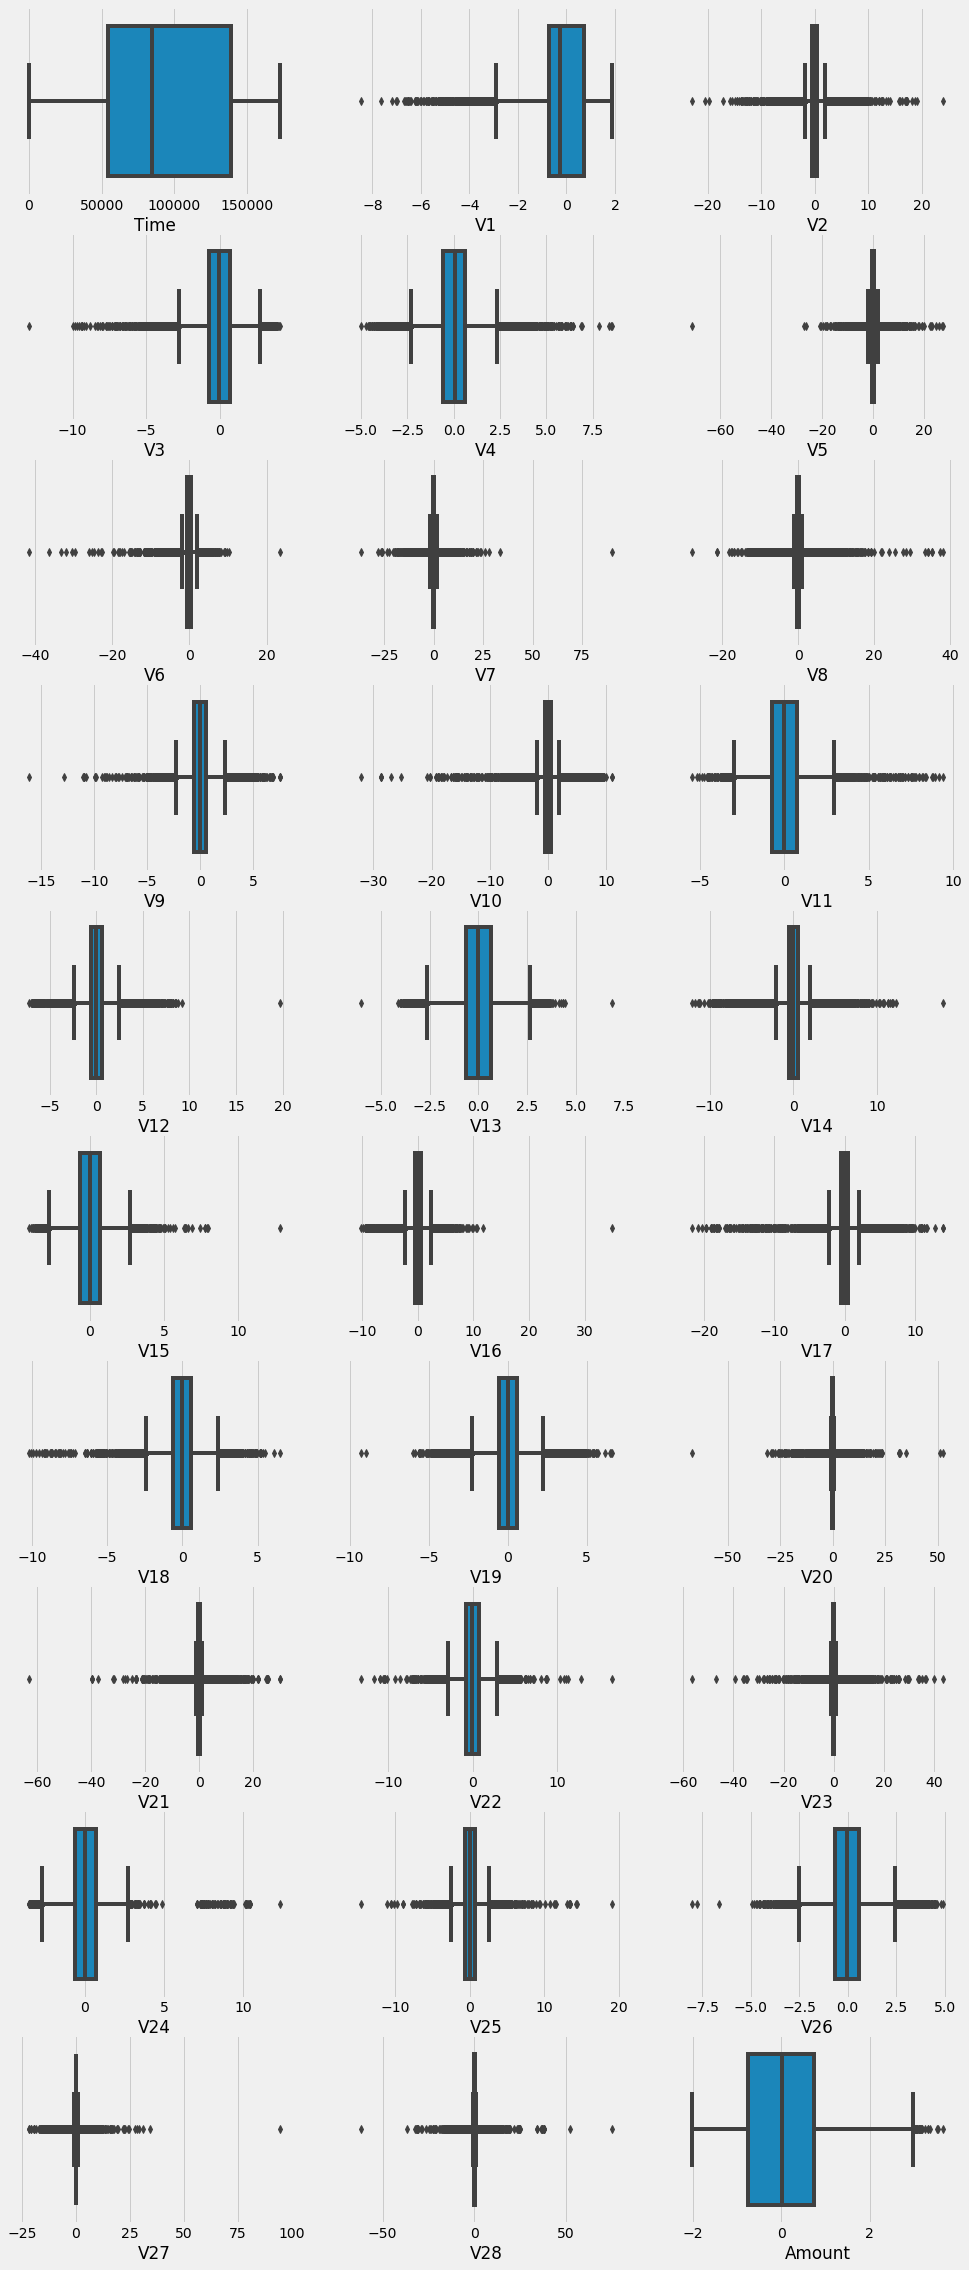

In [23]:
cols = train.columns
plt.figure(figsize=(15,38))
for i in enumerate(cols):
    plt.subplot(10,3, i[0]+1)
    sb.boxplot(x=train[i[1]])
    
plt.show();

- ***Observations:***
- Even after performing power transformation we can see lot of outliers in the variables, however 'Amount' variable has less outliers as compared to before transform
- Still we will go head with the transformation

## (iii) Standardizing the variables

- Since variables have different scales, it is better to perform standardization to bring values of the variable in same scale

In [24]:
# Initiating standard scaler

scaler = StandardScaler()

In [25]:
# Transforming the variables

varss = list(X_train.columns)

train[varss] = scaler.fit_transform(train[varss])

In [26]:
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
2557,-1.951441,-1.241353,-0.385254,0.489178,-1.280166,0.585093,-1.434760,0.755444,-0.575159,1.187693,-0.373335,0.364687,0.556799,0.123379,-0.306814,1.457207,-1.034046,-0.390481,-0.742242,-0.486426,-1.065434,-0.278406,1.279880,1.420050,0.674547,0.577462,-1.838925,0.974601,-0.451024,-1.536707
247823,1.241812,-0.433397,-2.200645,-1.923197,0.558139,0.059097,1.156282,1.235385,-0.113416,0.068163,-0.299829,0.895836,0.711075,-0.275403,1.218429,0.573035,-0.639066,0.049790,-1.077224,-1.089703,2.773786,1.166283,-0.145117,-1.468632,-1.323903,-0.959195,1.305334,-0.719072,0.353031,2.217024
152342,0.053397,-1.073938,-0.436806,1.888355,-0.657944,-0.872512,1.148117,-1.143510,0.909511,1.696011,-0.662840,-2.230547,-2.330414,1.214930,0.072119,-2.435268,-1.420706,1.192121,2.559320,-0.563840,-0.711416,-0.706887,-0.596890,-0.438848,-0.080437,0.897639,1.604250,-0.161881,0.284620,0.731530
103385,-0.550194,0.628272,0.030733,-0.055561,0.396698,-0.050165,0.020225,-0.127955,0.078951,-0.008804,-0.078268,1.336626,0.314798,-0.751543,0.033003,0.839784,0.567416,-0.090600,-0.059000,-0.158552,-0.195187,-0.320434,-1.016502,0.175645,-0.686238,0.207505,0.359974,-0.049844,0.049453,-1.269391
8771,-1.744044,-0.740551,0.397798,0.736347,-1.144812,0.473227,0.492751,0.270460,0.198714,1.235280,-0.597925,1.064592,-2.065539,1.194022,1.892904,-0.573433,1.062177,-0.494578,0.559759,-0.572352,0.154362,-0.375984,-0.657535,-0.210440,-2.011771,-0.484781,1.524355,0.866961,0.675667,0.332489


## (iv) Dealing with class imbalance

In [12]:
y_train.value_counts(normalize=True)*100

0    99.821432
1     0.178568
Name: Class, dtype: float64

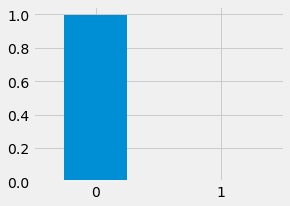

In [10]:
# Plotting class imbalance

plt.figure(figsize=(4,3))
y_train.value_counts(normalize=True).plot(kind='bar', rot=False)
plt.show();

- ***Observations:***
- AS we can see the labels are very much imbalanced, percentage of fraudulent transactions are not even visible in the graph above
- We will be using oversampling techniques to deal with the class imbalance

- For balancing the dataset we will try 2 techniques
    - **SMOTETomek**
        - SMOTE: Synthetic Minority Oversampling Technique
        - SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.

    <br>
    - **ADASYN**
        - ADASYN: Adaptive Synthetic Sampling Approach
        - ADASYN is a generalized form of the SMOTE algorithm. This algorithm also aims to oversample the minority class by generating synthetic instances for it. But the difference here is it considers the density distribution, ri which decides the no. of synthetic instances generated for samples which difficult to learn. Due to this, it helps in adaptively changing the decision boundaries based on the samples difficult to learn. <br>This is the major difference compared to SMOTE.
- We will analyse which one works better for this dataset

In [28]:
# Initiating over sampling techniques

smote = SMOTETomek(random_state=42)
adasyn = ADASYN(random_state=42)

- Wall time: 57min 6s for 'SMOTETomek'

In [29]:
%%time
# fit_transforming the dataset using 'SMOTETomek'

train_smt, labels_smt = smote.fit_resample(train, y_train)

Wall time: 23min 52s


In [30]:
print(f'The class labels value counts before SMOTETomek oversampling is: \n{(y_train.value_counts())}')
print('\n')
print(f'The class labels value counts after SMOTETomek oversampling is: \n{pd.Series(labels_smt).value_counts()}')

The class labels value counts before SMOTETomek oversampling is: 
0    199008
1       356
Name: Class, dtype: int64


The class labels value counts after SMOTETomek oversampling is: 
1    199008
0    199008
Name: Class, dtype: int64


- Wall time: Wall time: 11.5 s for 'ADASYN'

In [31]:
%%time
# fit_transforming the dataset using 'ADASYN'

train_ada, labels_ada = adasyn.fit_resample(train, y_train)

Wall time: 5.32 s


In [32]:
print(f'The class labels value counts before ADASYN oversampling is: \n{(y_train.value_counts())}')
print('\n')
print(f'The class labels value counts after ADASYN oversampling is: \n{pd.Series(labels_ada).value_counts()}')

The class labels value counts before ADASYN oversampling is: 
0    199008
1       356
Name: Class, dtype: int64


The class labels value counts after ADASYN oversampling is: 
0    199008
1    198995
Name: Class, dtype: int64


- ***Observations:***
- As we can see that the value counts of class labels after applying oversampling techniques is almost equal for both 'SMOTETomek' over-sampling and 'ADASYN' over-sampling
- Let us see how application of these oversampling techniques affect performance of different models 

# 5. Model Building

### Applying K-Fold cross validation on the train data

- We will perform startified K-Fold cross validation on the train dataset using following as the estimators
    - Logistic Regression
    - Decision Tree Classifier
    - Random Forest Classifier
    - XGBoost Classifier
- The estimator which gives best results will be selected and then we will perform Randomized search CV
- First we will perform cross validate on original dataset, then on ADASYN resampled dataset
- Second we will perform cross validate on SMOTETomek resample dataset, then on ADASYN resampled dataset
- **Note:** This being a very imbalanced dataset accuracy is not taken into consideration, we will consider 'roc_auc' score as the metric

## 5(A). Building models on original/non-oversampled dataset

### Logistic Regression

In [33]:
%%time
# Using cross validate to get 'roc_auc', 'recall', 'precision' on train dataset

strat_kf = StratifiedKFold(n_splits=10)
log_reg_default = cross_validate(estimator=LogisticRegression(random_state=42),
                       X=train, y=y_train, 
                       scoring=['roc_auc', 'recall', 'precision'], 
                       return_train_score=True,return_estimator=True,
                       cv=strat_kf, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 26 s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   25.9s finished


In [34]:
# Sorting the data frame by 'test_recall' in descending order

pd.DataFrame(log_reg_default).sort_values(by='test_roc_auc', ascending=False).head()

,fit_time,score_time,estimator,test_roc_auc,train_roc_auc,test_recall,train_recall,test_precision,train_precision
9,1.745666,0.039967,LogisticRegression(random_state=42),0.998781,0.977526,0.666667,0.631250,0.923077,0.889868
6,1.888077,0.057976,LogisticRegression(random_state=42),0.991822,0.977489,0.571429,0.641745,0.909091,0.884120
5,2.075110,0.068946,LogisticRegression(random_state=42),0.979042,0.979001,0.542857,0.641745,0.904762,0.880342
7,1.718530,0.059978,LogisticRegression(random_state=42),0.978123,0.978470,0.571429,0.651090,0.909091,0.889362
4,1.918143,0.049151,LogisticRegression(random_state=42),0.977247,0.979843,0.657143,0.657321,0.821429,0.894068


#### Feature Importance

In [38]:
logreg_feat_imp_def = pd.DataFrame({'Features':list(train.columns), 'Importance':list(np.abs(log_reg_default['estimator'][9]\
                                    .coef_.reshape(30,)))}).sort_values(by='Importance', ascending=False)
logreg_feat_imp_def.head()

,Features,Importance
4,V4,0.815146
14,V14,0.806551
12,V12,0.667671
3,V3,0.418298
22,V22,0.415762


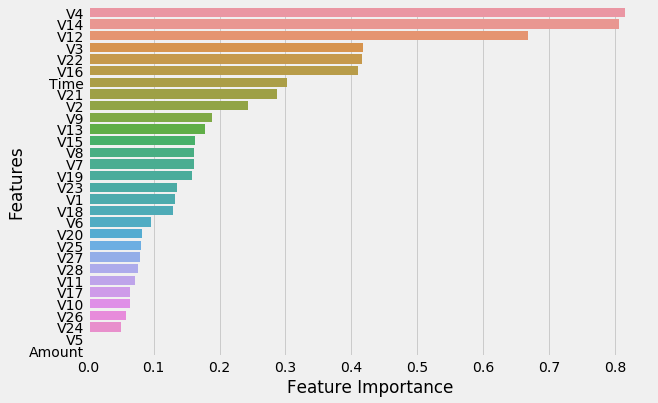

In [39]:
# Plotting feature importance

plt.figure(figsize=(9,6))
sb.barplot(x=logreg_feat_imp_def.Importance, y=logreg_feat_imp_def.Features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show();

- ***Observations:***
- **Note:** Taken absolute values of coef to keep the plot simple
- The best CV model gives 'test_roc_auc', 'test_recall', 'test_precision' are 0.99878, 0.66667 and 0.92308 respectively, even though roc_auc is pretty good, recall is poor
- The top 5 features according to this model are 'V4', 'V14', 'V12', 'V3' and 'V22' (in that order)

### Decision Tree Classifier

In [40]:
%%time
# Using cross validate to get 'roc_auc', 'recall', 'precision' on train dataset

strat_kf = StratifiedKFold(n_splits=10)
dt_default = cross_validate(estimator=DecisionTreeClassifier(random_state=42),
                       X=train, y=y_train, 
                       scoring=['roc_auc', 'recall', 'precision'], 
                       return_train_score=True,return_estimator=True,
                       cv=strat_kf, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 3min 44s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.7min finished


In [41]:
# Sorting the data frame by 'test_recall' in descending order

pd.DataFrame(dt_default).sort_values(by='test_roc_auc', ascending=False).head()

,fit_time,score_time,estimator,test_roc_auc,train_roc_auc,test_recall,train_recall,test_precision,train_precision
1,40.749553,0.077140,DecisionTreeClassifier(random_state=42),0.902552,1.0,0.805556,1.0,0.763158,1.0
8,13.506369,0.021950,DecisionTreeClassifier(random_state=42),0.902552,1.0,0.805556,1.0,0.763158,1.0
6,16.493343,0.023937,DecisionTreeClassifier(random_state=42),0.899849,1.0,0.800000,1.0,0.823529,1.0
9,17.625324,0.022939,DecisionTreeClassifier(random_state=42),0.874899,1.0,0.750000,1.0,0.870968,1.0
7,15.840038,0.042885,DecisionTreeClassifier(random_state=42),0.871152,1.0,0.742857,1.0,0.702703,1.0


#### Feature Importance

In [43]:
dt_feat_imp_def = pd.DataFrame({'Features':list(train.columns), 'Importance':list(dt_default['estimator'][1].feature_importances_)})\
            .sort_values(by='Importance', ascending=False)
dt_feat_imp_def.head()

,Features,Importance
17,V17,0.525519
14,V14,0.132995
10,V10,0.040224
1,V1,0.027946
4,V4,0.027636


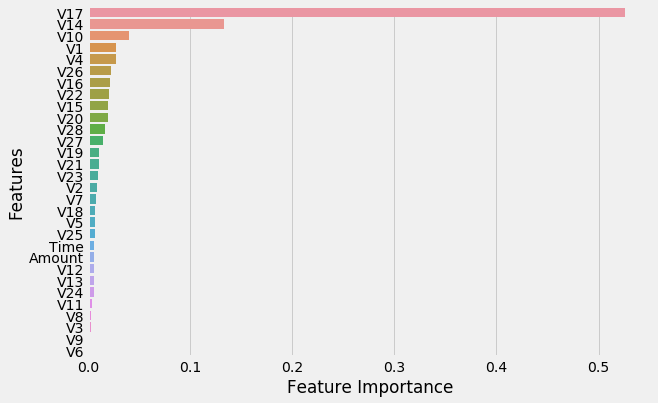

In [44]:
# Plotting feature importance

plt.figure(figsize=(9,6))
sb.barplot(x=dt_feat_imp_def.Importance, y=dt_feat_imp_def.Features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show();

- ***Observations:***
- The best CV model gives 'test_roc_auc', 'test_recall', 'test_precision' are 0.90255, 0.80556 and 0.76316 respectively
- The top 5 features according to this model are 'V17', 'V14', 'V10', 'V1' and 'V4' (in that order)

### Random Forest Classifier

In [45]:
%%time
# Using cross validate to get 'roc_auc', 'recall', 'precision' on train dataset

strat_kf = StratifiedKFold(n_splits=10)
rf_default = cross_validate(estimator=RandomForestClassifier(random_state=42),
                       X=train, y=y_train, 
                       scoring=['roc_auc', 'recall', 'precision'], 
                       return_train_score=True,return_estimator=True,
                       cv=strat_kf, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 29min 34s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 29.6min finished


In [46]:
# Sorting the data frame by 'test_recall' in descending order

pd.DataFrame(rf_default).sort_values(by='test_roc_auc', ascending=False).head()

,fit_time,score_time,estimator,test_roc_auc,train_roc_auc,test_recall,train_recall,test_precision,train_precision
7,178.907989,0.576951,"(DecisionTreeClassifier(max_features='auto', r...",0.970439,1.0,0.800000,1.000000,0.823529,1.0
1,176.369059,0.365398,"(DecisionTreeClassifier(max_features='auto', r...",0.957002,1.0,0.750000,1.000000,0.964286,1.0
6,170.014486,0.371168,"(DecisionTreeClassifier(max_features='auto', r...",0.955132,1.0,0.800000,1.000000,1.000000,1.0
9,192.019948,0.353086,"(DecisionTreeClassifier(max_features='auto', r...",0.942361,1.0,0.805556,1.000000,0.906250,1.0
8,175.093522,0.383797,"(DecisionTreeClassifier(max_features='auto', r...",0.942357,1.0,0.861111,0.996875,0.911765,1.0


#### Feature Importance

In [48]:
rf_feat_imp_def = pd.DataFrame({'Features':list(train.columns), 'Importance':list(rf_default['estimator'][7].feature_importances_)})\
            .sort_values(by='Importance', ascending=False)
rf_feat_imp_def.head()

,Features,Importance
17,V17,0.156798
12,V12,0.141441
14,V14,0.129727
10,V10,0.072237
16,V16,0.071395


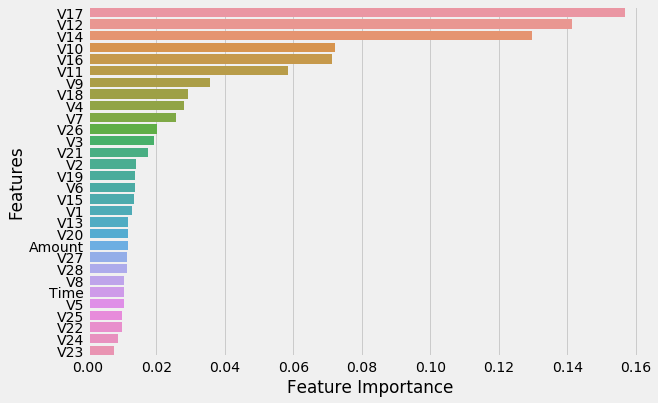

In [49]:
# Plotting feature importance

plt.figure(figsize=(9,6))
sb.barplot(x=rf_feat_imp_def.Importance, y=rf_feat_imp_def.Features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show();

- ***Observations:***
- The best CV model gives 'test_roc_auc', 'test_recall', 'test_precision' are 0.97044, 0.80000 and 0.82353 respectively, recall and precision are low comparatively
- The top 5 features according to this model are 'V17', 'V12', 'V14', 'V10' and 'V16' (in that order)

### XGBoost Classifier

In [50]:
%%time
# Using cross validate to get 'roc_auc', 'recall', 'precision' on train dataset

strat_kf = StratifiedKFold(n_splits=10)
xgb_default = cross_validate(estimator=XGBClassifier(),
                       X=train, y=y_train, 
                       scoring=['roc_auc', 'recall', 'precision'], 
                       return_train_score=True,return_estimator=True,
                       cv=strat_kf, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 8min 21s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  8.4min finished


In [51]:
# Sorting the data frame by 'test_recall' in descending order

pd.DataFrame(xgb_default).sort_values(by='test_roc_auc', ascending=False).head()

,fit_time,score_time,estimator,test_roc_auc,train_roc_auc,test_recall,train_recall,test_precision,train_precision
9,48.377601,0.099266,XGBClassifier(),0.998177,0.997337,0.777778,0.828125,0.875000,0.970696
6,49.033322,0.179923,XGBClassifier(),0.995816,0.997627,0.771429,0.831776,1.000000,0.978022
1,45.815982,0.101759,XGBClassifier(),0.991291,0.997634,0.805556,0.828125,0.966667,0.985130
5,51.541953,0.096741,XGBClassifier(),0.985323,0.997791,0.742857,0.828660,0.928571,0.977941
7,49.996112,0.103762,XGBClassifier(),0.984602,0.997375,0.828571,0.828660,0.828571,0.985185


#### Feature Importance

In [53]:
xg_feat_imp_def = pd.DataFrame({'Features':list(train.columns), 'Importance':list(xgb_default['estimator'][9].feature_importances_)})\
            .sort_values(by='Importance', ascending=False)
xg_feat_imp_def.head()

,Features,Importance
17,V17,0.253843
14,V14,0.112294
10,V10,0.055061
27,V27,0.033734
0,Time,0.032662


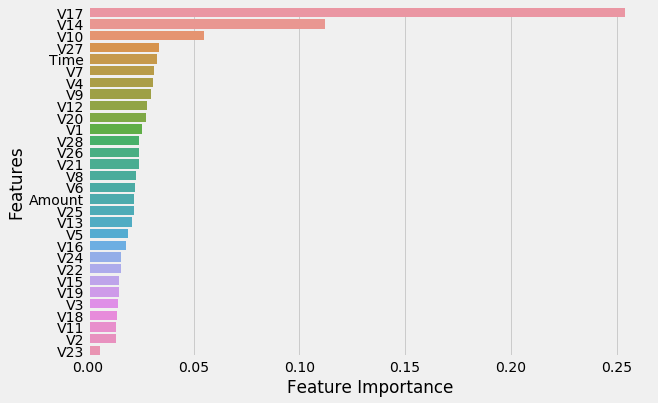

In [54]:
# Plotting feature importance

plt.figure(figsize=(9,6))
sb.barplot(x=xg_feat_imp_def.Importance, y=xg_feat_imp_def.Features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show();

- ***Observations:***
- The best CV model gives 'test_roc_auc', 'test_recall', 'test_precision' are 0.99818, 0.77778 and 0.87500 respectively, recall is low comparatively
- The top 5 features according to this model are 'V17', 'V14', 'V10', 'V27' and 'Time' (in that order)
- We will perform oversampling and see how is the performance of above models

### Logistic Regression

- **On SMOTETomek oversampled dataset**

In [55]:
%%time
# Using cross validate to get 'roc_auc', 'recall', 'precision' on train dataset

strat_kf = StratifiedKFold(n_splits=10)
log_reg_smotetom = cross_validate(estimator=LogisticRegression(random_state=42),
                       X=train_smt, y=labels_smt, 
                       scoring=['roc_auc', 'recall', 'precision'], 
                       return_train_score=True,return_estimator=True,
                       cv=strat_kf, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 25.3 s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   25.2s finished


In [78]:
# Sorting the data frame by 'test_recall' in descending order

pd.DataFrame(log_reg_smotetom).sort_values(by='test_roc_auc', ascending=False).head()

,fit_time,score_time,estimator,test_roc_auc,train_roc_auc,test_recall,train_recall,test_precision,train_precision
0,2.483691,0.048869,LogisticRegression(random_state=42),0.990082,0.989798,0.924476,0.920852,0.968367,0.969020
6,1.818212,0.044880,LogisticRegression(random_state=42),0.990056,0.989783,0.922764,0.920981,0.970048,0.968882
5,1.855175,0.057845,LogisticRegression(random_state=42),0.989976,0.989829,0.921763,0.921081,0.969505,0.969147
2,1.715003,0.044113,LogisticRegression(random_state=42),0.989928,0.989802,0.923371,0.920896,0.970119,0.968805
1,1.748082,0.040891,LogisticRegression(random_state=42),0.989854,0.989793,0.922768,0.920846,0.967749,0.969247


- **On ADASYN oversampled dataset**

In [57]:
%%time
# Using cross validate to get 'roc_auc', 'recall', 'precision' on train dataset

strat_kf = StratifiedKFold(n_splits=10)
log_reg_ada = cross_validate(estimator=LogisticRegression(random_state=42),
                       X=train_ada, y=labels_ada, 
                       scoring=['roc_auc', 'recall', 'precision'], 
                       return_train_score=True,return_estimator=True,
                       cv=strat_kf, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 29.4 s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   29.3s finished


In [79]:
# Sorting the data frame by 'test_recall' in descending order

pd.DataFrame(log_reg_ada).sort_values(by='test_roc_auc', ascending=False).head()

,fit_time,score_time,estimator,test_roc_auc,train_roc_auc,test_recall,train_recall,test_precision,train_precision
9,2.050025,0.043882,LogisticRegression(random_state=42),0.993331,0.962772,0.993568,0.882694,0.909308,0.895524
6,2.558109,0.083779,LogisticRegression(random_state=42),0.979532,0.963993,0.933464,0.878194,0.903058,0.897646
3,1.732535,0.044880,LogisticRegression(random_state=42),0.968630,0.965175,0.927534,0.880148,0.906621,0.901269
1,2.020517,0.108202,LogisticRegression(random_state=42),0.965883,0.965006,0.859347,0.887769,0.895809,0.900082
7,2.075208,0.037948,LogisticRegression(random_state=42),0.962618,0.965575,0.858284,0.890115,0.892366,0.900254


### Decision Tree Classifier

- **On SMOTETomek oversampled dataset**

In [59]:
%%time
# Using cross validate to get 'roc_auc', 'recall', 'precision' on train dataset

strat_kf = StratifiedKFold(n_splits=10)
dt_smotetom = cross_validate(estimator=DecisionTreeClassifier(random_state=42),
                       X=train_smt, y=labels_smt, 
                       scoring=['roc_auc', 'recall', 'precision'], 
                       return_train_score=True,return_estimator=True,
                       cv=strat_kf, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 6min 41s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  6.7min finished


In [80]:
# Sorting the data frame by 'test_recall' in descending order

pd.DataFrame(dt_smotetom).sort_values(by='test_roc_auc', ascending=False).head()

,fit_time,score_time,estimator,test_roc_auc,train_roc_auc,test_recall,train_recall,test_precision,train_precision
5,37.965594,0.059839,DecisionTreeClassifier(random_state=42),0.998744,1.0,0.999096,1.0,0.998393,1.0
2,40.736274,0.089807,DecisionTreeClassifier(random_state=42),0.998593,1.0,0.998844,1.0,0.998343,1.0
6,43.713760,0.055210,DecisionTreeClassifier(random_state=42),0.998467,1.0,0.999447,1.0,0.997492,1.0
4,39.811503,0.049866,DecisionTreeClassifier(random_state=42),0.998392,1.0,0.999447,1.0,0.997342,1.0
1,36.686719,0.087765,DecisionTreeClassifier(random_state=42),0.998266,1.0,0.999096,1.0,0.997442,1.0


- **On ADASYN oversampled dataset**

In [61]:
%%time
# Using cross validate to get 'roc_auc', 'recall', 'precision' on train dataset

strat_kf = StratifiedKFold(n_splits=10)
dt_ada = cross_validate(estimator=DecisionTreeClassifier(random_state=42),
                       X=train_ada, y=labels_ada, 
                       scoring=['roc_auc', 'recall', 'precision'], 
                       return_train_score=True,return_estimator=True,
                       cv=strat_kf, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 7min 33s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  7.6min finished


In [81]:
# Sorting the data frame by 'test_recall' in descending order

pd.DataFrame(dt_ada).sort_values(by='test_roc_auc', ascending=False).head()

,fit_time,score_time,estimator,test_roc_auc,train_roc_auc,test_recall,train_recall,test_precision,train_precision
9,42.854053,0.048323,DecisionTreeClassifier(random_state=42),0.975151,1.0,0.952563,1.0,0.997632,1.0
1,43.410641,0.045875,DecisionTreeClassifier(random_state=42),0.965503,1.0,0.933166,1.0,0.997690,1.0
6,45.393425,0.047873,DecisionTreeClassifier(random_state=42),0.939268,1.0,0.880346,1.0,0.997949,1.0
5,44.130501,0.050863,DecisionTreeClassifier(random_state=42),0.931554,1.0,0.865270,1.0,0.997509,1.0
0,42.863652,0.049217,DecisionTreeClassifier(random_state=42),0.916658,1.0,0.835126,1.0,0.997838,1.0


### Random Forest Classifier

- **On SMOTETomek oversampled dataset**

In [63]:
%%time
# Using cross validate to get 'roc_auc', 'recall', 'precision' on train dataset

strat_kf = StratifiedKFold(n_splits=10)
rf_smotetom = cross_validate(estimator=RandomForestClassifier(random_state=42),
                       X=train_smt, y=labels_smt, 
                       scoring=['roc_auc', 'recall', 'precision'], 
                       return_train_score=True,return_estimator=True,
                       cv=strat_kf, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 1h 50min 36s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 110.6min finished


In [77]:
# Sorting the data frame by 'test_recall' in descending order

pd.DataFrame(rf_smotetom).sort_values(by='test_roc_auc', ascending=False).head()

,fit_time,score_time,estimator,test_roc_auc,train_roc_auc,test_recall,train_recall,test_precision,train_precision
5,762.559841,2.839158,"(DecisionTreeClassifier(max_features='auto', r...",1.0,1.0,1.0,1.0,0.999900,1.0
2,564.394177,2.209976,"(DecisionTreeClassifier(max_features='auto', r...",1.0,1.0,1.0,1.0,0.999849,1.0
6,745.784933,2.767103,"(DecisionTreeClassifier(max_features='auto', r...",1.0,1.0,1.0,1.0,0.999900,1.0
1,562.198124,2.162298,"(DecisionTreeClassifier(max_features='auto', r...",1.0,1.0,1.0,1.0,0.999950,1.0
3,564.117576,2.299903,"(DecisionTreeClassifier(max_features='auto', r...",1.0,1.0,1.0,1.0,0.999648,1.0


- **On ADASYN oversampled dataset**

In [65]:
%%time
# Using cross validate to get 'roc_auc', 'recall', 'precision' on train dataset

strat_kf = StratifiedKFold(n_splits=10)
rf_ada = cross_validate(estimator=RandomForestClassifier(random_state=42),
                       X=train_ada, y=labels_ada, 
                       scoring=['roc_auc', 'recall', 'precision'], 
                       return_train_score=True,return_estimator=True,
                       cv=strat_kf, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 1h 29min 56s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 89.9min finished


In [82]:
# Sorting the data frame by 'test_recall' in descending order

pd.DataFrame(rf_ada).sort_values(by='test_roc_auc', ascending=False).head()

,fit_time,score_time,estimator,test_roc_auc,train_roc_auc,test_recall,train_recall,test_precision,train_precision
9,338.467148,1.738913,"(DecisionTreeClassifier(max_features='auto', r...",0.999967,1.0,0.940653,1.0,0.999893,1.0
6,336.403725,1.947753,"(DecisionTreeClassifier(max_features='auto', r...",0.999877,1.0,0.894668,1.0,0.999944,1.0
0,625.238634,2.456994,"(DecisionTreeClassifier(max_features='auto', r...",0.999801,1.0,0.836784,1.0,0.999820,1.0
7,353.112167,1.177765,"(DecisionTreeClassifier(max_features='auto', r...",0.999501,1.0,0.836926,1.0,0.999580,1.0
4,649.514869,3.134126,"(DecisionTreeClassifier(max_features='auto', r...",0.998989,1.0,0.816624,1.0,0.999692,1.0


### XG Boost Classifier

- **On SMOTETomek oversampled dataset**

In [67]:
%%time
# Using cross validate to get 'roc_auc', 'recall', 'precision' on train dataset

strat_kf = StratifiedKFold(n_splits=10)
xgb_smotetom = cross_validate(estimator=XGBClassifier(),
                       X=train_smt, y=labels_smt, 
                       scoring=['roc_auc', 'recall', 'precision'], 
                       return_train_score=True,return_estimator=True,
                       cv=strat_kf, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 17min 53s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 17.9min finished


In [83]:
# Sorting the data frame by 'test_recall' in descending order

pd.DataFrame(xgb_smotetom).sort_values(by='test_roc_auc', ascending=False).head()

,fit_time,score_time,estimator,test_roc_auc,train_roc_auc,test_recall,train_recall,test_precision,train_precision
9,106.099525,0.693769,XGBClassifier(),0.998735,0.998672,0.970353,0.972452,0.989445,0.988743
3,106.474348,0.519655,XGBClassifier(),0.998708,0.998735,0.971810,0.972100,0.990018,0.989762
4,104.675209,0.257303,XGBClassifier(),0.998704,0.998717,0.972614,0.971989,0.989975,0.989226
5,105.139657,0.283837,XGBClassifier(),0.998697,0.998678,0.970604,0.970548,0.988587,0.988963
6,107.304533,0.254319,XGBClassifier(),0.998654,0.998692,0.971658,0.972257,0.989307,0.989623


- **On ADASYN oversampled dataset**

In [69]:
%%time
# Using cross validate to get 'roc_auc', 'recall', 'precision' on train dataset

strat_kf = StratifiedKFold(n_splits=10)
xgb_ada = cross_validate(estimator=XGBClassifier(),
                       X=train_ada, y=labels_ada, 
                       scoring=['roc_auc', 'recall', 'precision'], 
                       return_train_score=True,return_estimator=True,
                       cv=strat_kf, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 17min 49s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 17.8min finished


In [84]:
# Sorting the data frame by 'test_recall' in descending order

pd.DataFrame(xgb_ada).sort_values(by='test_roc_auc', ascending=False).head()

,fit_time,score_time,estimator,test_roc_auc,train_roc_auc,test_recall,train_recall,test_precision,train_precision
9,104.003112,0.604163,XGBClassifier(),0.998348,0.996653,1.000000,0.986817,0.968323,0.966430
6,103.545070,1.364097,XGBClassifier(),0.996987,0.996879,0.988592,0.988241,0.966351,0.966889
1,104.330545,0.478154,XGBClassifier(),0.994776,0.996945,0.976482,0.986303,0.964415,0.967583
7,103.582555,0.768215,XGBClassifier(),0.993820,0.996923,0.953566,0.986516,0.965452,0.968216
2,102.026872,0.520185,XGBClassifier(),0.988450,0.997173,0.903568,0.984237,0.968074,0.972187


- ***Observations:***
- Evaluation of the oversampled models have been done in the following 'Model Evaluation' section

# 6. Model Evaluation

- First we will define a function 
- Second, it will take the cross-validate results of each model which is a dictionary, list of names of models, true labels and oversampled labels
- Third, it will calculate 'roc_auc', 'recall' and 'precision' score for each cross-validate model and return a dataframe
- **Note:** Here we will be using **'roc_auc'** score as a measure of an optimal model

In [75]:
def metrics_comparison(x, cols, labels_true, labels_smt, labels_ada):
    '''It creates data frame containing 'roc_auc', 'recall', 'precision' scores.
    Note: name of different models should end with either default or smotetom or ada'''
           
    # Creating empty lists
    roc_auc, recall, precision = [], [], []

    # Calculating 'roc_auc', 'recall', 'precision'
    for i in range(len(x)):

        roc_auc.append(max(x[i]['test_roc_auc']))

        recall.append(max(x[i]['test_recall']))

        precision.append(max(x[i]['test_precision']))


    # Creating data frame
    results = pd.DataFrame([roc_auc, recall, precision], 
                           index=['roc_auc', 'recall', 'precision'], 
                           columns=cols)

    return results.transpose()

In [76]:
%%time
list1 = [log_reg_default, log_reg_smotetom, log_reg_ada, dt_default, 
         dt_smotetom, dt_ada, rf_default, rf_smotetom, rf_ada,
          xgb_default, xgb_smotetom, xgb_ada]

cols = ['log_reg_default', 'log_reg_smotetom', 'log_reg_ada', 'dt_default', 
        'dt_smotetom', 'dt_ada',  'rf_default', 'rf_smotetom', 'rf_ada',
        'xgb_default', 'xgb_smotetom', 'xgb_ada']

results = metrics_comparison(list1, cols, y_train, labels_smt, labels_ada)
results

Wall time: 3.47 s


,roc_auc,recall,precision
log_reg_default,0.998781,0.805556,0.958333
log_reg_smotetom,0.990082,0.924476,0.970119
log_reg_ada,0.993331,0.993568,0.909308
dt_default,0.902552,0.805556,0.870968
dt_smotetom,0.998744,0.999447,0.998393
dt_ada,0.975151,0.952563,0.997949
rf_default,0.970439,0.861111,1.000000
rf_smotetom,1.000000,1.000000,0.999950
rf_ada,0.999967,0.940653,0.999944
xgb_default,0.998177,0.833333,1.000000


- ***Observations:***
- 'roc_auc' score of 'Random Forest Classifier' with SMOTETomek oversampling is '1.0'
- Hence we will be choosing 'Random Forest' with SMOTETomek oversampling as our optimal model, also we will be performing 'GridSearchCV' on SMOTETomek sampled data using 'Random Forest' as the model

# 7. Hyper-parameter Tuning

- Tried performing grid search on compelete dataset which was over-sampled via 'SMOTETomek' method
- However, it was computationally intensive in my system
- Since we want to know how variations in each parameter affects the model performance, a subset of dataset would be enough
- Hence we will sample 100K data points and performed 'GridSearchCV' on them
- Below is the process for sampling 100K data points

In [33]:
train_smt.shape, labels_smt.shape

((398016, 30), (398016,))

In [34]:
# Importing shuffle to shuffle the sub-sampled dataset
from sklearn.utils import shuffle

# Concatenating the dataset and the respectives class labels
train_smt_whole = pd.concat([train_smt, labels_smt], axis=1)

# Separating dataset according to the class labels
train_smt_whole_1 = train_smt_whole.loc[train_smt_whole['Class']==1,:]
train_smt_whole_0 = train_smt_whole.loc[train_smt_whole['Class']==0,:]

# Performing random sampling for 50K data points from both the the datasets
sub_train_smt1 = train_smt_whole_1.sample(50000,random_state=42)
sub_train_smt0 = train_smt_whole_0.sample(50000,random_state=42)

# Concatenating the separated datasets after random sampling
sub_train_smt = pd.concat([sub_train_smt1, sub_train_smt0], axis=0)

# Shuffling the dataset after concatenation
sub_train_smt = shuffle(sub_train_smt)

# Separating class labels from the dataset
train_smt_100K = sub_train_smt.drop('Class', axis=1)
labels_smt_100K = sub_train_smt['Class']

In [40]:
train_smt_100K.shape, labels_smt_100K.shape

((100000, 30), (100000,))

### Performing GridSearchCV on train dataset using 'Random Forest Classifier'

- **Initial Model**

In [36]:
params = {'n_estimators':[100,200,300],
         'criterion':['gini', 'entropy'],
         'max_depth': [20, 30, 45],
         'min_samples_split':[30, 50, 100]}

rf_gs = RandomForestClassifier(random_state=42, warm_start=True)
rf_gs_smt = GridSearchCV(estimator=rf_gs, 
                         param_grid=params, 
                         scoring='roc_auc', 
                         cv=5, n_jobs=-1,
                         return_train_score=True,
                         verbose=1)

In [39]:
%%time

rf_gs_smt.fit(train_smt_100K, labels_smt_100K)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 121.1min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 181.4min finished


Wall time: 3h 5min 59s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(random_state=42, warm_start=True),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 45],
                         'min_samples_split': [30, 50, 100],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [41]:
gs_results = pd.DataFrame(rf_gs_smt.cv_results_)
gs_results.sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
47,473.352990,6.939842,2.032292,0.761628,entropy,45,30,300,"{'criterion': 'entropy', 'max_depth': 45, 'min...",0.999995,0.999975,0.999969,0.999980,0.999991,0.999982,0.000010,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.844639e-09
38,546.480267,7.666114,2.480351,0.729006,entropy,30,30,300,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.999995,0.999975,0.999969,0.999980,0.999991,0.999982,0.000010,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.209365e-09
29,525.662745,5.774677,2.206393,0.502016,entropy,20,30,300,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.999995,0.999974,0.999970,0.999979,0.999988,0.999981,0.000009,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.817622e-08
46,309.210021,3.689486,1.184206,0.476941,entropy,45,30,200,"{'criterion': 'entropy', 'max_depth': 45, 'min...",0.999995,0.999967,0.999969,0.999982,0.999991,0.999981,0.000011,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000e-09
37,357.726490,6.209603,1.660181,0.266159,entropy,30,30,200,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.999995,0.999966,0.999969,0.999982,0.999991,0.999981,0.000011,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.194490e-09
28,353.409341,5.294302,1.659295,0.228145,entropy,20,30,200,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.999995,0.999966,0.999968,0.999981,0.999989,0.999980,0.000011,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.925406e-08
41,490.398204,7.945771,2.110636,0.427001,entropy,30,50,300,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.999992,0.999969,0.999964,0.999974,0.999983,0.999977,0.000010,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.968747e-08
50,462.469643,2.204321,1.940767,0.407276,entropy,45,50,300,"{'criterion': 'entropy', 'max_depth': 45, 'min...",0.999992,0.999969,0.999964,0.999974,0.999983,0.999976,0.000010,8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.193318e-08
32,533.311704,7.955977,2.358228,0.736158,entropy,20,50,300,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.999991,0.999968,0.999963,0.999973,0.999985,0.999976,0.000010,9,0.999999,0.999999,0.999999,1.000000,1.000000,0.999999,1.310639e-07
40,330.220842,7.193266,1.490644,0.089386,entropy,30,50,200,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.999991,0.999964,0.999965,0.999976,0.999984,0.999976,0.000011,10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.109419e-08


In [42]:
rf_gs_smt.best_params_

{'criterion': 'entropy',
 'max_depth': 45,
 'min_samples_split': 30,
 'n_estimators': 300}

- **Modified Model**

In [43]:
params_2 = {'n_estimators':[250, 300, 350],
         'criterion':['entropy'],
         'max_depth': [35, 40, 45],
         'min_samples_split':[25, 30, 35]}

rf_gs_2 = RandomForestClassifier(random_state=42, warm_start=True)
rf_gs_smt_2 = GridSearchCV(estimator=rf_gs_2, 
                         param_grid=params_2, 
                         scoring='roc_auc', 
                         cv=5, n_jobs=-1,
                         return_train_score=True,
                         verbose=1)

In [45]:
%%time

rf_gs_smt_2.fit(train_smt_100K, labels_smt_100K)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 36.7min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 141.6min finished


Wall time: 2h 25min 43s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(random_state=42, warm_start=True),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [35, 40, 45],
                         'min_samples_split': [25, 30, 35],
                         'n_estimators': [250, 300, 350]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [46]:
pd.DataFrame(rf_gs_smt_2.cv_results_).sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
2,547.336190,6.339410,2.452606,0.412690,entropy,35,25,350,"{'criterion': 'entropy', 'max_depth': 35, 'min...",0.999997,0.999979,0.999980,0.999977,0.999992,0.999985,0.000008,1,1.0,1.0,1.0,1.0,1.0,1.0,2.256934e-09
20,560.410708,5.822609,2.294589,0.266094,entropy,45,25,350,"{'criterion': 'entropy', 'max_depth': 45, 'min...",0.999997,0.999979,0.999980,0.999977,0.999992,0.999985,0.000008,1,1.0,1.0,1.0,1.0,1.0,1.0,2.256934e-09
11,583.441494,7.955509,2.348081,0.196405,entropy,40,25,350,"{'criterion': 'entropy', 'max_depth': 40, 'min...",0.999997,0.999979,0.999980,0.999977,0.999992,0.999985,0.000008,1,1.0,1.0,1.0,1.0,1.0,1.0,2.256934e-09
1,462.655822,6.709330,1.895875,0.368440,entropy,35,25,300,"{'criterion': 'entropy', 'max_depth': 35, 'min...",0.999996,0.999980,0.999980,0.999976,0.999992,0.999985,0.000008,4,1.0,1.0,1.0,1.0,1.0,1.0,2.721443e-09
19,489.215321,7.022914,1.838729,0.021721,entropy,45,25,300,"{'criterion': 'entropy', 'max_depth': 45, 'min...",0.999996,0.999980,0.999980,0.999976,0.999992,0.999985,0.000008,4,1.0,1.0,1.0,1.0,1.0,1.0,2.721443e-09
10,496.294204,4.976006,2.125559,0.186149,entropy,40,25,300,"{'criterion': 'entropy', 'max_depth': 40, 'min...",0.999996,0.999980,0.999980,0.999976,0.999992,0.999985,0.000008,4,1.0,1.0,1.0,1.0,1.0,1.0,2.721443e-09
0,372.105825,2.826139,1.605362,0.210091,entropy,35,25,250,"{'criterion': 'entropy', 'max_depth': 35, 'min...",0.999996,0.999977,0.999980,0.999977,0.999992,0.999985,0.000008,7,1.0,1.0,1.0,1.0,1.0,1.0,2.651650e-09
18,411.127062,6.018708,1.689041,0.148972,entropy,45,25,250,"{'criterion': 'entropy', 'max_depth': 45, 'min...",0.999996,0.999977,0.999980,0.999977,0.999992,0.999985,0.000008,7,1.0,1.0,1.0,1.0,1.0,1.0,2.651650e-09
9,401.422820,13.082219,1.751641,0.150218,entropy,40,25,250,"{'criterion': 'entropy', 'max_depth': 40, 'min...",0.999996,0.999977,0.999980,0.999977,0.999992,0.999985,0.000008,7,1.0,1.0,1.0,1.0,1.0,1.0,2.651650e-09
23,568.010089,14.307829,2.296775,0.091356,entropy,45,30,350,"{'criterion': 'entropy', 'max_depth': 45, 'min...",0.999995,0.999974,0.999972,0.999979,0.999990,0.999982,0.000009,10,1.0,1.0,1.0,1.0,1.0,1.0,3.737479e-09


In [47]:
rf_gs_smt_2.best_params_

{'criterion': 'entropy',
 'max_depth': 35,
 'min_samples_split': 25,
 'n_estimators': 350}

- **Final Model**

In [48]:
params_3 = {'n_estimators':[250, 350],
         'criterion':['entropy'],
         'max_depth': [35, 40, 45],
         'min_samples_split':[25]}

rf_gs_3 = RandomForestClassifier(random_state=42, warm_start=True)
rf_gs_smt_3 = GridSearchCV(estimator=rf_gs_3, 
                         param_grid=params_3, 
                         scoring='roc_auc', 
                         cv=5, n_jobs=-1,
                         return_train_score=True,
                         verbose=1)

In [49]:
%%time

rf_gs_smt_3.fit(train_smt_100K, labels_smt_100K)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 26.4min finished


Wall time: 31min 4s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(random_state=42, warm_start=True),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [35, 40, 45],
                         'min_samples_split': [25],
                         'n_estimators': [250, 350]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [50]:
pd.DataFrame(rf_gs_smt_3.cv_results_).sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,462.572124,3.686242,1.977309,0.101870,entropy,35,25,350,"{'criterion': 'entropy', 'max_depth': 35, 'min...",0.999997,0.999979,0.99998,0.999977,0.999992,0.999985,0.000008,1,1.0,1.0,1.0,1.0,1.0,1.0,2.256934e-09
3,467.418665,7.326831,1.682203,0.468962,entropy,40,25,350,"{'criterion': 'entropy', 'max_depth': 40, 'min...",0.999997,0.999979,0.99998,0.999977,0.999992,0.999985,0.000008,1,1.0,1.0,1.0,1.0,1.0,1.0,2.256934e-09
5,396.566760,7.124909,1.208885,0.518291,entropy,45,25,350,"{'criterion': 'entropy', 'max_depth': 45, 'min...",0.999997,0.999979,0.99998,0.999977,0.999992,0.999985,0.000008,1,1.0,1.0,1.0,1.0,1.0,1.0,2.256934e-09
0,333.421212,4.882754,1.394871,0.263193,entropy,35,25,250,"{'criterion': 'entropy', 'max_depth': 35, 'min...",0.999996,0.999977,0.99998,0.999977,0.999992,0.999985,0.000008,4,1.0,1.0,1.0,1.0,1.0,1.0,2.651650e-09
2,333.226308,9.477187,1.565412,0.105178,entropy,40,25,250,"{'criterion': 'entropy', 'max_depth': 40, 'min...",0.999996,0.999977,0.99998,0.999977,0.999992,0.999985,0.000008,4,1.0,1.0,1.0,1.0,1.0,1.0,2.651650e-09
4,327.696697,8.877838,1.498106,0.074647,entropy,45,25,250,"{'criterion': 'entropy', 'max_depth': 45, 'min...",0.999996,0.999977,0.99998,0.999977,0.999992,0.999985,0.000008,4,1.0,1.0,1.0,1.0,1.0,1.0,2.651650e-09


In [51]:
rf_gs_smt_3.best_params_

{'criterion': 'entropy',
 'max_depth': 35,
 'min_samples_split': 25,
 'n_estimators': 350}

- ***Observations:***
- We start with initial model by selecting random parameters, we got 'mean_test_score' of 0.999982
- Then we modify the parameters by considering those which are close to previousy selected parameters and check whther his improves the mean test score further and we got 'mean_test_score' of 0.999985.
- We again modified the parameters by considering those which are close to previousy selected parameters and check whther his improves the mean test score further but still we got 'mean_test_score' of 0.999985.
- Parameters of 'rf_gs_ada_3' are the final parameters which we will use for predicting test labels

### Calculating cross val score using parameters of 'rf_gs_ada_3' model

In [53]:
%%time
# Using calculating the cross val score to get 'roc_auc'

skf = StratifiedKFold(n_splits=10)

final_rf_smt = RandomForestClassifier(n_estimators=350, criterion='entropy', 
                                      max_depth=35, min_samples_split=25,
                                      random_state=42)

rf_final_cv = cross_val_score(estimator=final_rf_smt,
                       X=train_smt, y=labels_smt, 
                       scoring='roc_auc', 
                       n_jobs=-1,
                       cv=skf, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed: 56.0min remaining: 37.4min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 93.4min finished


Wall time: 1h 33min 27s


In [71]:
# Calculating confidence interval for 'roc_auc'

print(f'The mean of cross val scores is: {round(rf_final_cv.mean(),6)}')

The mean of cross val scores is: 0.999999


## 8. Making prediction on Test Dataset

- First We need to power transform the test dataset variables
- Second we need to normalize the variables
- **Note:** It is not necessary to normalize the variables as we are using a Tree model (Random Forest Classifier) for prediction, however we are doing it because we normalized the train dataset as we were also using logistic regression and it requires the dataset to be normalized

- **Using power transform on test dataset variables**

In [58]:
X_test.shape, y_test.shape

((85443, 30), (85443,))

In [59]:
var_list = list(X_test.columns[1:])

test = X_test.copy()

test[var_list] = pt.transform(test[var_list])

- **Standardizing the test dataset variables**

In [60]:
varss = list(test.columns)

test[varss] = scaler.transform(test[varss])

In [61]:
test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-1.121516,-4.183650,7.799838,-6.672837,5.226982,-9.262393,-2.722909,-13.911262,11.294263,-9.767543,-17.275125,4.507979,-5.248975,1.659330,-6.847851,0.351024,-7.769112,-17.097333,-9.090849,3.705066,-1.932079,1.605008,-1.525349,-3.573355,1.181528,-2.514829,-0.988234,-4.769787,-3.400666,1.600467
49906,-1.063463,-0.039770,-1.583338,-0.250013,-1.008364,-1.039069,0.832530,-0.418605,0.149600,0.838963,-0.502822,-0.040453,1.156018,0.087993,-0.309689,-0.206429,-2.184693,0.116168,2.160295,0.538006,0.648527,-0.282088,-1.283402,-0.841491,-1.733926,0.578731,-1.742072,0.093607,0.327500,1.788849
29474,-1.248342,0.813048,-0.450453,-0.035478,-0.714444,-0.399480,0.142196,-0.570866,-0.075210,-0.891512,0.724513,0.565033,-0.051679,1.077208,-0.338283,0.144090,2.334447,-0.658628,-0.649339,1.451863,0.270654,0.159430,0.215104,-0.277984,-1.293905,0.976959,-0.425569,0.020294,0.026780,0.225576
276481,1.524513,-0.494057,1.128200,-1.129346,-0.179049,0.558355,-0.427651,0.225226,0.542390,-0.406208,-1.338148,-1.347411,0.081804,1.133358,-0.641040,0.652759,0.536255,0.585388,1.182661,0.134482,-0.316329,0.509250,1.220309,-0.296976,-0.126416,-0.429043,-0.253606,-0.590343,0.018393,-1.386529
278846,1.552949,1.405941,-0.175370,-0.784964,0.307265,-0.144964,-0.731378,0.038306,-0.231946,0.379708,0.283992,0.929124,0.952986,-0.613567,0.606264,-0.693359,0.029314,-0.589065,-0.416594,0.504241,-0.329964,-0.317849,-0.852743,0.551311,0.007634,-0.709792,0.448172,-0.200417,-0.207921,-1.575021


- **Predicting the test labels**

In [62]:
# Initiating the model

rf_final_model = RandomForestClassifier(n_estimators=350, criterion='entropy', 
                                      max_depth=35, min_samples_split=25,
                                      random_state=42)

In [63]:
%%time
# Fitting the model on train dataset

rf_final_model.fit(train_ada, labels_ada)

Wall time: 26min


RandomForestClassifier(criterion='entropy', max_depth=35, min_samples_split=25,
                       n_estimators=350, random_state=42)

#### Feature Importance

In [64]:
rf_feat_imp = pd.DataFrame({'Features':list(train.columns), 'Importance':list(rf_final_model.feature_importances_)})\
            .sort_values(by='Importance', ascending=False)
rf_feat_imp.head()

,Features,Importance
4,V4,0.152099
14,V14,0.135238
17,V17,0.072655
10,V10,0.048530
12,V12,0.047420


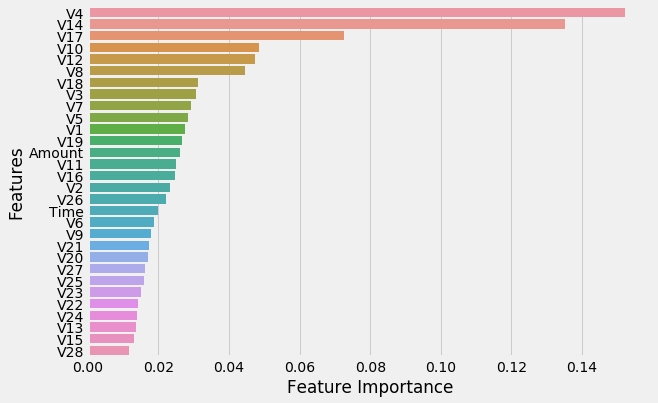

In [65]:
# Plotting feature importance

plt.figure(figsize=(9,6))
sb.barplot(x=rf_feat_imp.Importance, y=rf_feat_imp.Features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show();

- ***Observations:***
- The best CV model gives mean 'roc_auc' score of 0.996829
- The top 5 features according to this model are 'V4', 'V14', 'V17', 'V10' and 'V12' (in that order)
- Cannot say much about these variables as they are principal components and are linear combinations of the original variables

In [66]:
# Predicting the test labels

y_test_pred = rf_final_model.predict(test)

In [72]:
# Calculating 'AUC' score

print(f'The AUC score on the test dataset is: {round(roc_auc_score(y_test, y_test_pred),6)}')

The AUC score on the test dataset is: 0.937353


## Conclusion:
- Even though cross val score had mean roc_auc score of 0.999999, we got roc_auc score of 0.937353
- One of the reason may be that the model is overfitting, second may be that we are using sythetic data which only guesses the distribution of fraudulent transactions and it is no way an actual distribution
- This shows how different unseen data can be from training data, so there is need for regular monitoring of the model even after deploying in the production